Data Augmentation

In [ ]:
import os
import csv
research_dir = "/content/drive/MyDrive/Research stuff/dataset"
abstracts= []
labels= []

Loading the dataset from the csv file to the list.

In [ ]:
for fname in os.listdir(research_dir):
  print(fname)
  f = open(os.path.join(research_dir, fname))
  data = csv.reader(f)
  for row in data:
    if (row[0].strip() != ''):
      abstracts.append(row[0].strip())
      if fname == "pos.csv":
        labels.append(2)
      elif fname == "neg_missing_primary_data.csv":
        labels.append(1)
      elif fname == "neg_not_about_viruses.csv":
        labels.append(0)


pos.csv
neg_missing_primary_data.csv
neg_not_about_viruses.csv


Testing if the datas are processed to the list or not

In [ ]:
print(abstracts[0])
print(labels[0])
print(len(abstracts))
print(len(labels))

For 35 months, we monitored hantavirus activity in rodent populations in central Arizona. The most frequently captured hantavirus antibody-positive rodents were Peromyscus boylii and P. truei. Antibody-positive P. boylii were more frequently male (84%), older, and heavier, and they survived longer on trapping web sites than antibody-negative mice. The number of antibody-positive P. boylii was greater during high population densities than during low densities, while antibody prevalence was greater during low population densities. Virus transmission and incidence rates, also related to population densities, varied by trapping site. The spatial distribution of antibody-positive P. boylii varied by population density and reflected the species preference for dense chaparral habitats. The focal ranges of antibody-positive P. boylii also demonstrated a patchy distribution of hantavirus.
2
7781
7781


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Tokenizing the data

In [ ]:
maxlen = len((max((abstracts), key=lambda x: len(x.split()))).split())
tokenizer = Tokenizer()
tokenizer.fit_on_texts(abstracts)
print(maxlen)

X = tokenizer.texts_to_sequences(abstracts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
vocab_size = len(word_index) + 1

X = pad_sequences(X, maxlen=maxlen)
Y = np.asarray(labels)

657
Found 41353 unique tokens.


Shuffling the Data

In [ ]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

Checking if the data is tokenized

In [ ]:
print(X[0])
Y[0]

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

1

In [ ]:
len(X)

7781

Dividing the data into training and testing set

In [ ]:
X_train = X[:5000]
X_test = X[5000:]

Y_train = Y[:5000]
Y_test = Y[5000:]

In [ ]:
arr= [0,0,0]
for y in Y_test:
  arr[y] += 1
print(arr)


SyntaxError: ignored

Further dividing the training set to training and validation set

In [ ]:
X_val = X_train[:1000]
X_train = X_train[1000:]

Y_val = Y_train[:1000]
Y_train = Y_train[1000:]

Using Bidirectional LSTM

In [ ]:
import keras
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,Flatten
embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 657, 32)           1323328   
                                                                 
 bidirectional (Bidirectiona  (None, 657, 64)          16640     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 42048)             0         
                                                                 
 dense (Dense)               (None, 3)                 126147    
                                                                 
Total params: 1,466,115
Trainable params: 1,466,115
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=2,validation_data=(X_val, Y_val))

Epoch 1/5
125/125 [==============================] - 49s 364ms/step - loss: 0.5115 - accuracy: 0.7933 - val_loss: 0.2395 - val_accuracy: 0.9190
Epoch 2/5
125/125 [==============================] - 46s 365ms/step - loss: 0.0922 - accuracy: 0.9688 - val_loss: 0.2370 - val_accuracy: 0.9220
Epoch 3/5
125/125 [==============================] - 47s 376ms/step - loss: 0.0278 - accuracy: 0.9952 - val_loss: 0.2740 - val_accuracy: 0.9190
Epoch 4/5
125/125 [==============================] - 47s 374ms/step - loss: 0.0147 - accuracy: 0.9977 - val_loss: 0.2832 - val_accuracy: 0.9080
Epoch 5/5
125/125 [==============================] - 46s 368ms/step - loss: 0.0133 - accuracy: 0.9973 - val_loss: 0.3022 - val_accuracy: 0.9220


In [ ]:
results = model.evaluate(X_test,Y_test)
print(results)

87/87 [==============================] - 7s 83ms/step - loss: 0.3439 - accuracy: 0.9126
[0.34391823410987854, 0.9126213788986206]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

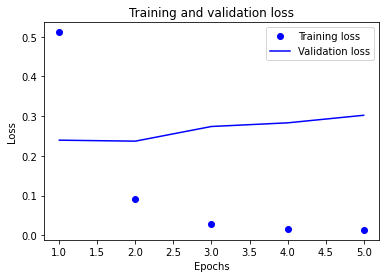

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

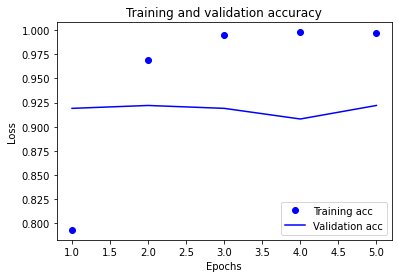

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()